## p.319 규제선형모델-릿지,라쏘,엘라스틱넷

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
y = bostonDF.PRICE
X = bostonDF.drop(columns=['PRICE'])

In [13]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, 
                                 X, 
                                 y, 
                                 scoring="neg_mean_squared_error",
                                 cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
neg_mse_scores,rmse_scores,avg_rmse

(array([-11.4217962 , -24.29446706, -28.14355069, -74.59916618,
        -28.51714218]),
 array([3.3796148 , 4.92894178, 5.30504955, 8.63708088, 5.3401444 ]),
 5.518166280868973)

In [11]:
print(neg_mse_scores)
print(rmse_scores)
print(avg_rmse)

[-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218]
[3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
5.518166280868973


In [12]:
print(np.round(neg_mse_scores,3))
print(np.round(rmse_scores, 3))
print(format(avg_rmse))

[-11.422 -24.294 -28.144 -74.599 -28.517]
[3.38  4.929 5.305 8.637 5.34 ]
5.518166280868973


In [16]:
alphas = [0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge,
                                     X,
                                     y,
                                     scoring='neg_mean_squared_error',
                                     cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores) 
    avg_rmse = np.mean(rmse_scores)
    print(f'alpha : {alpha} 일때 {avg_rmse:.3f}')

alpha : 0 일때 5.829
alpha : 0.1 일때 5.788
alpha : 1 일때 5.653
alpha : 10 일때 5.518
alpha : 100 일때 5.330


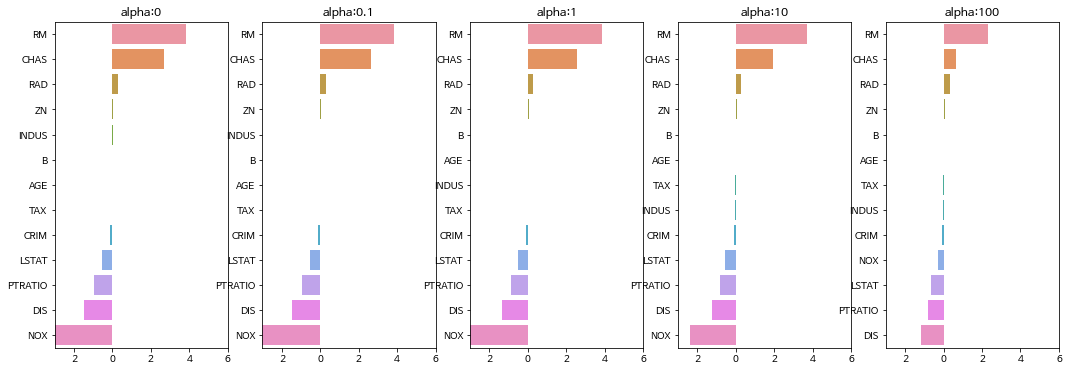

In [25]:
fig, axs = plt.subplots(figsize=(18,6),nrows=1,ncols=5)
coeff_df = pd.DataFrame()
for pos,alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff = pd.Series(data=ridge.coef_,index=X.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname]=coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])
plt.show()

In [26]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## p324 라쏘

In [27]:
from sklearn.linear_model import Lasso,ElasticNet

In [39]:
def get_linear_reg_eval(model_name,params=None,X=None,y=None,verbose=True):
    coeff_df=pd.DataFrame()
    if verbose:
        print('#####',model_name,'#####')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param,l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model,
                                         X,
                                         y,
                                         scoring='neg_mean_squared_error',
                                         cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'alpha : {param} 일때 5폴드 세트의 평균 rmse: {avg_rmse:.3f}')
        model.fit(X,y)
        coeff = pd.Series(data=ridge.coef_,index=X.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname]=coeff
    return coeff_df

In [40]:
lasso_alphas = [0.01,0.04,0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',lasso_alphas,X,y)

##### Lasso #####
alpha : 0.01 일때 5폴드 세트의 평균 rmse: 5.740
alpha : 0.04 일때 5폴드 세트의 평균 rmse: 5.637
alpha : 0.07 일때 5폴드 세트의 평균 rmse: 5.612
alpha : 0.1 일때 5폴드 세트의 평균 rmse: 5.615
alpha : 0.5 일때 5폴드 세트의 평균 rmse: 5.669
alpha : 1 일때 5폴드 세트의 평균 rmse: 5.776
alpha : 3 일때 5폴드 세트의 평균 rmse: 6.189


In [41]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

,alpha:0.01,alpha:0.04,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,2.334536,2.334536,2.334536,2.334536,2.334536,2.334536,2.334536
CHAS,0.638335,0.638335,0.638335,0.638335,0.638335,0.638335,0.638335
RAD,0.315358,0.315358,0.315358,0.315358,0.315358,0.315358,0.315358
ZN,0.054496,0.054496,0.054496,0.054496,0.054496,0.054496,0.054496
B,0.009393,0.009393,0.009393,0.009393,0.009393,0.009393,0.009393
AGE,0.001212,0.001212,0.001212,0.001212,0.001212,0.001212,0.001212
TAX,-0.015856,-0.015856,-0.015856,-0.015856,-0.015856,-0.015856,-0.015856
INDUS,-0.052826,-0.052826,-0.052826,-0.052826,-0.052826,-0.052826,-0.052826
CRIM,-0.102202,-0.102202,-0.102202,-0.102202,-0.102202,-0.102202,-0.102202
NOX,-0.262847,-0.262847,-0.262847,-0.262847,-0.262847,-0.262847,-0.262847


## p327 엘라스틱넷

In [42]:
elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elasstic_df = get_linear_reg_eval('ElasticNet',elastic_alphas,X,y)

##### ElasticNet #####
alpha : 0.07 일때 5폴드 세트의 평균 rmse: 5.542
alpha : 0.1 일때 5폴드 세트의 평균 rmse: 5.526
alpha : 0.5 일때 5폴드 세트의 평균 rmse: 5.467
alpha : 1 일때 5폴드 세트의 평균 rmse: 5.597
alpha : 3 일때 5폴드 세트의 평균 rmse: 6.068


In [43]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elasstic_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,2.334536,2.334536,2.334536,2.334536,2.334536
CHAS,0.638335,0.638335,0.638335,0.638335,0.638335
RAD,0.315358,0.315358,0.315358,0.315358,0.315358
ZN,0.054496,0.054496,0.054496,0.054496,0.054496
B,0.009393,0.009393,0.009393,0.009393,0.009393
AGE,0.001212,0.001212,0.001212,0.001212,0.001212
TAX,-0.015856,-0.015856,-0.015856,-0.015856,-0.015856
INDUS,-0.052826,-0.052826,-0.052826,-0.052826,-0.052826
CRIM,-0.102202,-0.102202,-0.102202,-0.102202,-0.102202
NOX,-0.262847,-0.262847,-0.262847,-0.262847,-0.262847
